In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_CdSe_augmented_adjusted.csv')
df

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,diameter_nm,abs_nm,emission_nm,Unnamed: 53
0,0,0,1.102480,-0.438782,-0.245227,-0.525726,-0.417578,-0.166760,-0.124145,-0.302794,...,1,0,0,1,0,0,3.41,566.000000,575.00,9.000000
1,1,1,0.325710,-0.473265,-0.588527,-0.525726,-0.499463,-0.452738,-0.527398,-0.302794,...,1,0,0,1,0,0,1.99,440.784362,497.00,56.215638
2,2,2,0.325710,-0.473265,-0.588527,-0.525726,-0.499463,-0.446393,-0.527398,-0.302794,...,1,0,0,1,0,0,2.13,461.024362,510.00,48.975638
3,3,3,0.325710,-0.473265,-0.588527,-0.525726,-0.499463,-0.446393,-0.527398,-0.302794,...,1,0,0,1,0,0,2.27,500.036190,517.00,16.963810
4,4,4,0.325710,-0.473265,-0.588527,-0.525726,-0.499463,-0.446393,-0.527398,-0.302794,...,1,0,0,1,0,0,2.53,500.036190,522.00,21.963810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,222,222,0.481064,-0.466369,-0.501557,-0.387095,-0.499463,-0.371514,-0.439424,0.219928,...,1,0,0,0,0,1,2.20,500.000000,535.50,35.500000
171,223,223,0.481064,-0.466369,-0.501557,-0.387095,-0.499463,-0.371514,-0.439424,0.219928,...,1,0,0,0,0,1,2.80,545.000000,562.25,17.250000
172,224,224,0.481064,-0.466369,-0.501557,-0.387095,-0.499463,-0.371514,-0.439424,0.219928,...,1,0,0,0,0,1,3.60,570.000000,590.35,20.350000
173,228,228,0.481064,-0.466369,-0.501557,-0.387095,-0.499463,-0.371514,-0.439424,5.968747,...,1,0,0,0,0,1,1.70,450.000000,517.50,67.500000


In [3]:
input_col = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)', 
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)', 
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate', 
             'x0_cadmium oxide', 'x0_cadmium stearate', 'x0_dimethylcadmium', 
             'x1_None', 'x1_benzoic acid', 'x1_dodecylphosphonic acid', 
             'x1_ethylphosphonic acid', 'x1_lauric acid', 
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline', 
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine', 
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine', 
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine', 
             'x3_tributylphosphine', 'x3_trioctylphosphine', 
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin', 
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide', 
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide'
            ]


#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [09:04<00:00, 22.67s/it]

0.1751925925925926 2 23 20


### 2D. Decision Tree 

In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:24<00:00,  7.04s/it]

0.21437901234567894 12 25 62


### 3D. Random Forest

In [6]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 40, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [05:10<00:00, 15.54s/it]

0.2426365432098766 11 5 29


### 4D. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:16<00:00,  2.31it/s]

0.2934314814814814 2 1


### Saving Decision Tree model

In [10]:
ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=20)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

joblib.dump(ET_regr_d, "./model_CdSe_SO_diameter_ExtraTrees.joblib")

['./model_CdSe_SO_diameter_ExtraTrees.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [11]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [09:13<00:00, 23.04s/it]

11.948842592592591 8 2 13


### 2E. Decision Trees

In [12]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 70, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:55<00:00,  6.04s/it]

8.373533950617288 13 5 32


### 3E. Random Forest

In [15]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 30, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [03:02<00:00,  9.12s/it]

12.88962962962964 13 5 11


### 4E. K Neighbors

In [16]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:15<00:00,  2.47it/s]

17.27777777777778 2 7


### Saving Extra Trees model

In [17]:
DT_regr_e = DecisionTreeRegressor(max_depth=13,
                                max_features=5,
                                random_state=32)
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

joblib.dump(ET_regr_e, "./model_CdSe_SO_emission_DecisionTrees.joblib")

['./model_CdSe_SO_emission_DecisionTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [18]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [12:49<00:00, 26.54s/it]

15.021156843209878 3 28 12


### 2A. Decision Trees


In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:22<00:00,  6.99s/it]

20.595959593939398 20 20 12


In [22]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.7157594152974505 ; MSE: 1033.208754199327 ; RMSE: 32.14356474007398 ; MAE: 20.595959593939398


### 3A. Random Forest

In [6]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [18:57<00:00, 37.92s/it]

23.743265995033656 19 12 11


### 4A. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  1.98it/s]

25.05050505151515 1 1


### Saving model

In [56]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12)
DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

joblib.dump(DT_regr_a, "./model_CdSe_SO_DecisionTree_abs.joblib")

['./model_SO_abs_DecisionTree.joblib']

## Analyzing

In [9]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=20)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

DT_regr_e = DecisionTreeRegressor(max_depth=13,
                                max_features=5,
                                random_state=32)
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))

E_mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
E_r_2 = r2_score(Y_test_e, DT_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, DT_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, DT_Y_pred_e, squared=False)


### Absorption

DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = DT_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
A_r_2 = r2_score(Y_test_a, DT_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, DT_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.722382               0.332323               0.29973                   0.547476
Absorption  0.715759              20.596               1033.21                     32.1436
Emission    0.838137              11.4646               405.795                    20.1443


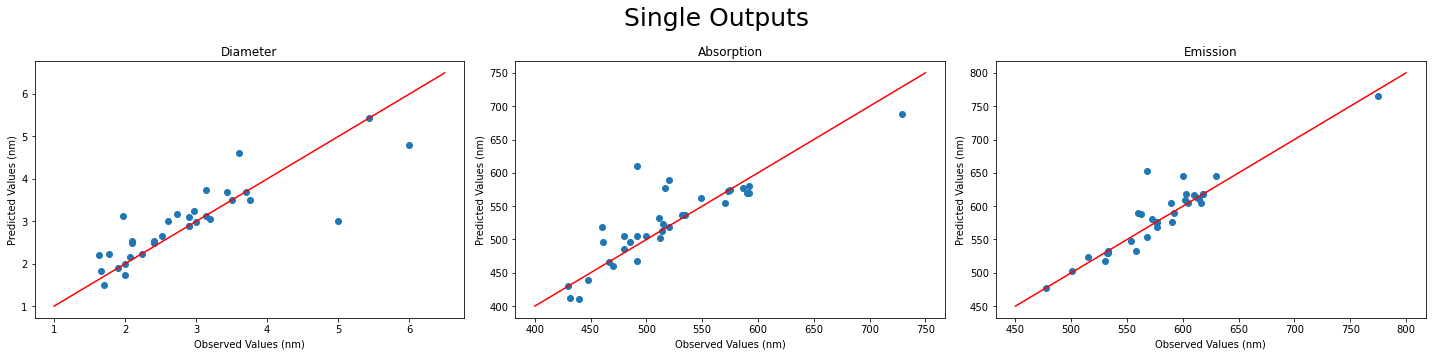

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, DT_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, DT_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [12]:
importance_dict_d = dict()
for i in range(0,71):
    importance_dict_d[input_col[i]] = DT_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('temp_c', 0.17115585620335333),
 ('in_amount_mmol', 0.13468545990339692),
 ('time_min', 0.13355474890232497),
 ('x7_zinc iodide', 0.07101466797367292),
 ('x5_dioctylamine', 0.06621019240471337),
 ('p_amount_mmol', 0.06536590068675731),
 ('x4_myristic acid', 0.0558952481080459),
 ('x0_indium acetate', 0.04684126669635279),
 ('acid_amount_mmol', 0.0304112532249981),
 ('total_volume_ml', 0.02505099100338304),
 ('other_amount_mmol', 0.021525020788561434),
 ('amine_amount_mmol', 0.020373308484199062),
 ('x6_None', 0.018212211879927515),
 ('x8_water', 0.016233610571304073),
 ('x0_chloroindium oxalate', 0.015303305170894756),
 ('x7_None', 0.015199083501020554),
 ('x3_None', 0.01422064443676377),
 ('x4_oleic acid', 0.013840602201838416),
 ('x1_tris(diethylamino)phosphine', 0.012524802135000913),
 ('x7_zinc bromide', 0.009957332531833852),
 ('x4_stearic acid', 0.008792469419095415),
 ('zinc_amount_mmol', 0.0072486396599350175),
 ('x1_phosphine gas', 0.007146992373895668),
 ('x8_copper bromide

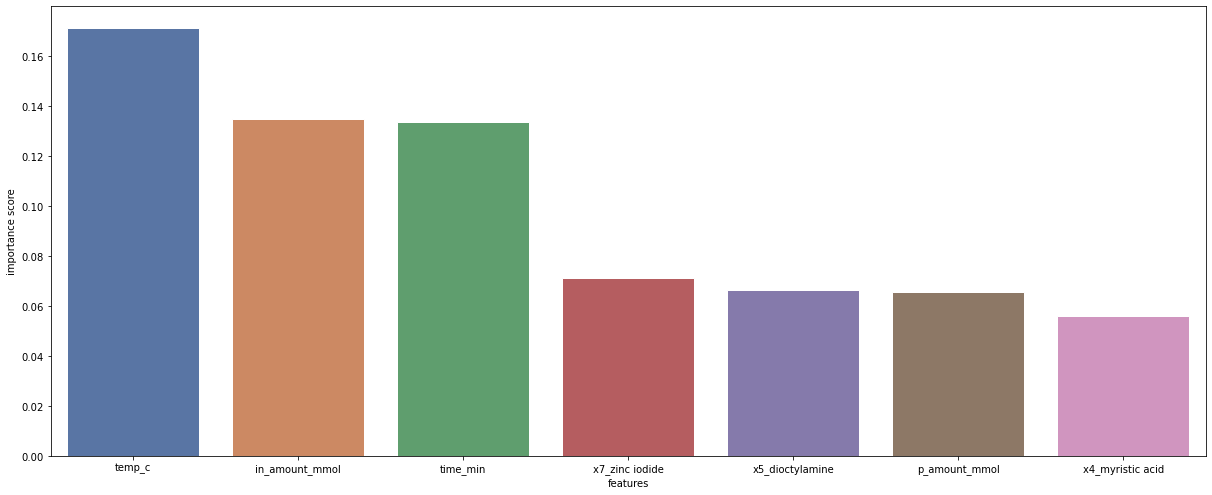

In [13]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [14]:
importance_dict_e = dict()
for i in range(0,71):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('x7_None', 0.14971628146089888),
 ('x0_indium oxalate', 0.11635116977876782),
 ('time_min', 0.10622227690585892),
 ('temp_c', 0.10591548312275978),
 ('x7_zinc iodide', 0.08309065786184468),
 ('x0_indium chloride', 0.07286107842374984),
 ('total_volume_ml', 0.037688035517084724),
 ('x1_phosphine gas', 0.03762058546484096),
 ('x7_zinc oleate', 0.03567404522182629),
 ('other_amount_mmol', 0.03563128809048837),
 ('in_amount_mmol', 0.029260170543899518),
 ('x7_zinc bromide', 0.025157258792322324),
 ('x3_None', 0.02480400023861778),
 ('x4_None', 0.02208329873378935),
 ('x5_dioctylamine', 0.016932496785663276),
 ('acid_amount_mmol', 0.01690420028341343),
 ('x1_white phosphorus', 0.014194439316321302),
 ('x0_indium bromide', 0.011765868416090246),
 ('p_amount_mmol', 0.009317873357110006),
 ('TOP_amount_mmol', 0.007694884946928168),
 ('x4_lauric acid', 0.005549274401949622),
 ('x8_None', 0.005126392434083934),
 ('sol_amount_ml', 0.004495168820410586),
 ('x2_octadecene', 0.0040412340577390665)

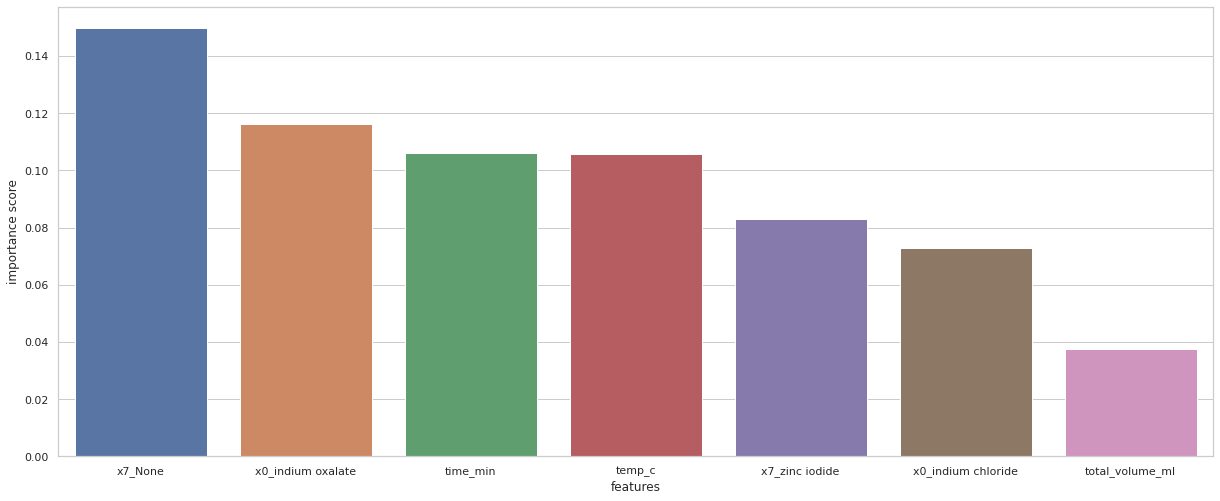

In [15]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [18]:
importance_dict_a = dict()
for i in range(0,71):
    importance_dict_a[input_col[i]] = DT_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('temp_c', 0.2197705845090209),
 ('time_min', 0.14861232814590902),
 ('x7_None', 0.09849710216892996),
 ('amine_amount_mmol', 0.0858852953673919),
 ('total_volume_ml', 0.07233345402138885),
 ('TOP_amount_mmol', 0.07109420883009378),
 ('x1_phosphine gas', 0.05891206796682794),
 ('x7_zinc iodide', 0.03746051309755293),
 ('x8_water', 0.034318177872038086),
 ('acid_amount_mmol', 0.02603300508947207),
 ('p_amount_mmol', 0.02098466258492522),
 ('x7_zinc chloride', 0.020344198969800435),
 ('x5_None', 0.015394351654261793),
 ('other_amount_mmol', 0.013926791047683594),
 ('x7_zinc bromide', 0.013366648584885725),
 ('x4_lauric acid', 0.012647803374373634),
 ('x0_indium chloride', 0.011207738505694315),
 ('x4_stearic acid', 0.00846879917214322),
 ('in_amount_mmol', 0.008174599777625944),
 ('x3_trioctylphosphine', 0.007182732083198252),
 ('x0_indium iodide', 0.0044419972903610395),
 ('sol_amount_ml', 0.0041175291495416004),
 ('zinc_amount_mmol', 0.001882284230793519),
 ('x1_sodium phosphide', 0.0

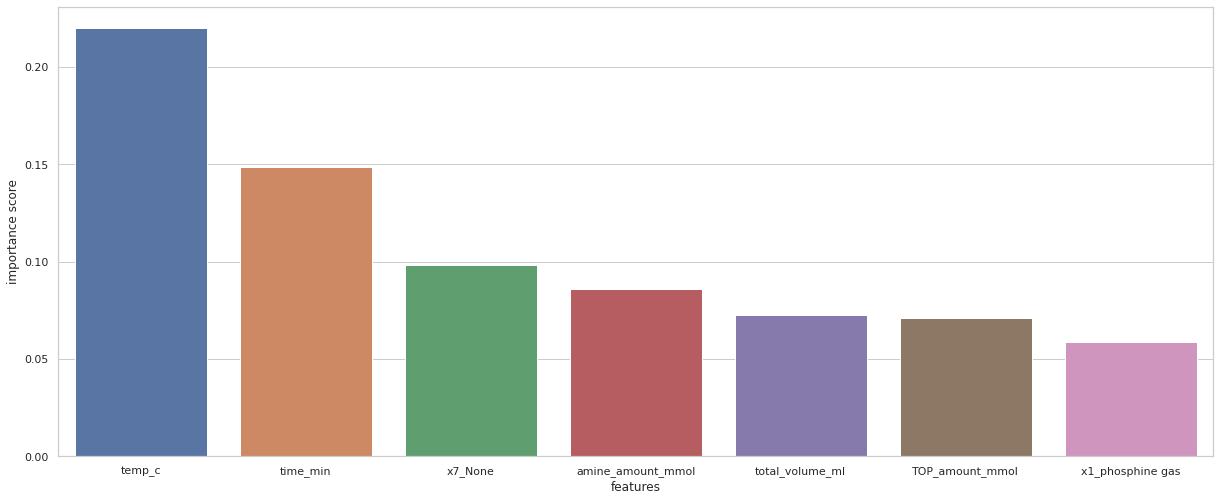

In [19]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [49]:
importance_dict_a

{'in_amount_mmol': 0.008174599777625944,
 'p_amount_mmol': 0.02098466258492522,
 'sol_amount_ml': 0.0041175291495416004,
 'TOP_amount_mmol': 0.07109420883009378,
 'acid_amount_mmol': 0.02603300508947207,
 'amine_amount_mmol': 0.0858852953673919,
 'thiol_amount_mmol': 0.0,
 'zinc_amount_mmol': 0.001882284230793519,
 'other_amount_mmol': 0.013926791047683594,
 'total_volume_ml': 0.07233345402138885,
 'temp_c': 0.2197705845090209,
 'time_min': 0.14861232814590902,
 'x0_chloroindium oxalate': 0.0010142211310188397,
 'x0_indium acetate': 3.975746833593852e-05,
 'x0_indium bromide': 6.744946138633628e-05,
 'x0_indium chloride': 0.011207738505694315,
 'x0_indium iodide': 0.0044419972903610395,
 'x0_indium myristate': 3.2455076192602868e-06,
 'x0_indium oxalate': 0.0,
 'x0_indium palmitate': 0.0,
 'x0_indium trifluoroacetate': 0.0,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0,
 'x1_bis(trimethylsilyl)phosphine': 0.0,
 'x1_phosphine gas': 0.05891206796682794,
 'x1_phosphorus trichloride

### Combine


In [24]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [40]:
sorted_d 

[('TOP_amount_mmol', 0.0024228303264090373),
 ('acid_amount_mmol', 0.0304112532249981),
 ('amine_amount_mmol', 0.020373308484199062),
 ('in_amount_mmol', 0.13468545990339692),
 ('other_amount_mmol', 0.021525020788561434),
 ('p_amount_mmol', 0.06536590068675731),
 ('sol_amount_ml', 0.0012206950358816273),
 ('temp_c', 0.17115585620335333),
 ('thiol_amount_mmol', 0.0),
 ('time_min', 0.13355474890232497),
 ('total_volume_ml', 0.02505099100338304),
 ('x0_chloroindium oxalate', 0.015303305170894756),
 ('x0_indium acetate', 0.04684126669635279),
 ('x0_indium bromide', 0.0001166107956815326),
 ('x0_indium chloride', 0.00023906112889393534),
 ('x0_indium iodide', 0.0),
 ('x0_indium myristate', 0.0),
 ('x0_indium oxalate', 0.0),
 ('x0_indium palmitate', 0.0),
 ('x0_indium trifluoroacetate', 0.0),
 ('x0_indium tris(N,N-diisopropylacetamidinato)', 0.0),
 ('x1_bis(trimethylsilyl)phosphine', 2.9152698920377968e-05),
 ('x1_phosphine gas', 0.007146992373895668),
 ('x1_phosphorus trichloride', 0.0),
 (

In [50]:
combined_importance = dict()

In [51]:
for i in range(0,71):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'TOP_amount_mmol': 0.08121192410343099,
 'acid_amount_mmol': 0.0733484585978836,
 'amine_amount_mmol': 0.10920840274798244,
 'in_amount_mmol': 0.1721202302249224,
 'other_amount_mmol': 0.0710830999267334,
 'p_amount_mmol': 0.09566843662879254,
 'sol_amount_ml': 0.009833393005833814,
 'temp_c': 0.496841923835134,
 'thiol_amount_mmol': 0.0,
 'time_min': 0.3883893539540929,
 'total_volume_ml': 0.1350724805418566,
 'x0_chloroindium oxalate': 0.016317526301913597,
 'x0_indium acetate': 0.050768324381677325,
 'x0_indium bromide': 0.011949928673158115,
 'x0_indium chloride': 0.08430787805833809,
 'x0_indium iodide': 0.0044419972903610395,
 'x0_indium myristate': 3.2455076192602868e-06,
 'x0_indium oxalate': 0.11635116977876782,
 'x0_indium palmitate': 0.0,
 'x0_indium trifluoroacetate': 0.0,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0,
 'x1_bis(trimethylsilyl)phosphine': 2.9152698920377968e-05,
 'x1_phosphine gas': 0.10367964580556457,
 'x1_phosphorus trichloride': 0.0,
 'x1_sodium 

In [55]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('temp_c', 0.496841923835134),
 ('time_min', 0.3883893539540929),
 ('x7_None', 0.26341246713084937),
 ('x7_zinc iodide', 0.19156583893307053),
 ('in_amount_mmol', 0.1721202302249224),
 ('total_volume_ml', 0.1350724805418566),
 ('x0_indium oxalate', 0.11635116977876782),
 ('amine_amount_mmol', 0.10920840274798244),
 ('x1_phosphine gas', 0.10367964580556457),
 ('p_amount_mmol', 0.09566843662879254),
 ('x0_indium chloride', 0.08430787805833809),
 ('x5_dioctylamine', 0.08324086579585928),
 ('TOP_amount_mmol', 0.08121192410343099),
 ('acid_amount_mmol', 0.0733484585978836),
 ('other_amount_mmol', 0.0710830999267334),
 ('x4_myristic acid', 0.05611973158861203),
 ('x0_indium acetate', 0.050768324381677325),
 ('x8_water', 0.050551788443342155),
 ('x7_zinc bromide', 0.04848123990904191),
 ('x3_None', 0.03902464467538155),
 ('x7_zinc oleate', 0.03567404522182629),
 ('x4_None', 0.02263450068930246),
 ('x7_zinc chloride', 0.022433279645367718),
 ('x6_None', 0.020945461639167957),
 ('x5_None', 0.0

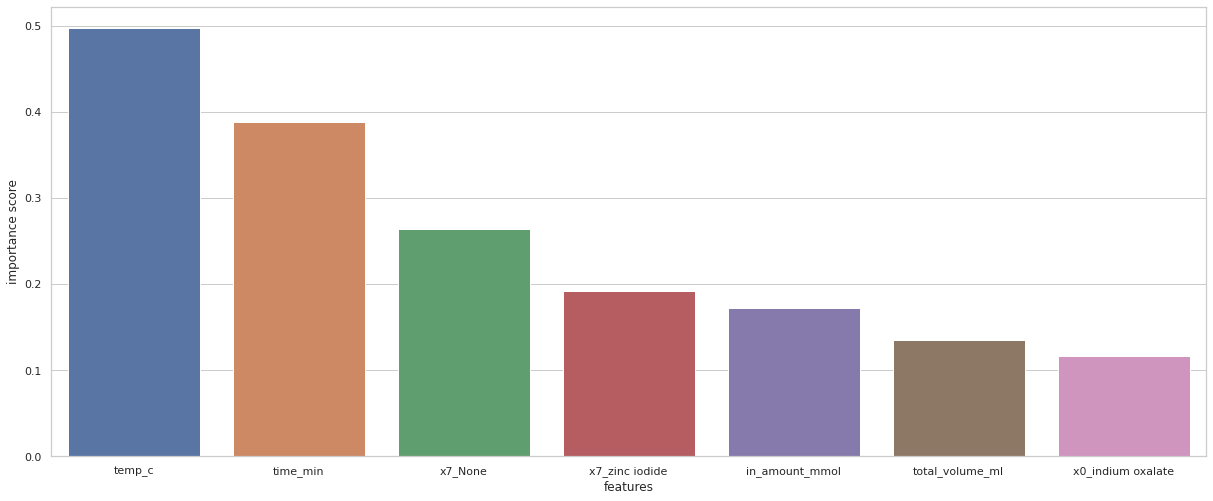

In [56]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)